# Cars4U Problem statement and approach

1. Observe and understand the structure of the data
2. Perform descriptive statistics and EDA
3. Perform feature engineering 
4. Perform missing value analysis
5. Build the linear regression model
6. Evaluate the model performance
7. Provide Recommendations

# Importing Standard libraries for EDA and SKlearn

In [1]:
# Importing package for EDA
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

# set column and row display lengths in jupyter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# sklearn's package
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Load data from CSV file

In [2]:
# load data from CSV file
df = pd.read_csv('used_cars_data.csv')

# 1 Understanding the structure of the data
## 1.1 Observing the data

In [3]:
# taking a random sample of the data
display(df.sample(8))

# Shape of the dataframe
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')
print("-----")

# Finding dtypes for features, no. of features, no. of rows, etc.
df.info()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3400,3400,BMW X1 sDrive20d,Kolkata,2012,22000,Diesel,Automatic,First,17.05 kmpl,1995 CC,184 bhp,5.0,NaN,11.50
389,389,Jaguar XE Portfolio,Mumbai,2017,9000,Petrol,Automatic,First,13.5 kmpl,1999 CC,246.74 bhp,5.0,53.72 Lakh,34.50
4714,4714,Mercedes-Benz E-Class 220 CDI,Ahmedabad,2011,78000,Diesel,Manual,Second,15.0 kmpl,2148 CC,NaN,5.0,NaN,14.50
2680,2680,Hyundai i10 Magna,Coimbatore,2012,43766,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,4.30
2709,2709,Honda Amaze V Petrol,Kochi,2016,40866,Petrol,Manual,First,19.5 kmpl,1199 CC,86.76 bhp,5.0,8.16 Lakh,5.47
2984,2984,Maruti Ritz LXi,Mumbai,2016,12000,Petrol,Manual,First,18.5 kmpl,1197 CC,85.80 bhp,5.0,NaN,3.65
1331,1331,Hyundai i20 Magna 1.4 CRDi,Delhi,2015,66823,Diesel,Manual,Second,22.54 kmpl,1396 CC,88.73 bhp,5.0,NaN,4.83
1663,1663,Maruti Wagon R LXI,Delhi,2012,45631,Petrol,Manual,Second,22.5 kmpl,998 CC,67.04 bhp,5.0,4.59 Lakh,2.74


There are 7253 rows and 14 columns.
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


## Notes from df.sample() and df.info()
- There are 14 Columns
    - 5 numerical, 9 categorical
- Looking at the sample from dataframe, the column S.No. seems to be a key which is already existing in dataframe as Index 
    - This column doesn't add any value for the purpose of regression; therefore it can be safely dropped
- Columns Mileage, Engine, Power, New_Price are categorical
     - they would probably suit better as numerical data types for regression analysis in predicting car price
- Columns Mileage, Engine, Power have suffixes for units, such as: kmpl, CC, bhp which should be removed for performing regression
- Column New_Price has suffixes both Cr (crores) and Lakh that needs to be unified & preprocessed before those suffixes are removed

## 1.2 Perform descriptive statistics on data

In [4]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Notes from descriptive statistics
- It is clear that most features are not numerical
- Mahindra XUV500 W8 2WD is the most sold car in the data; Mumbai is the most active city for car Sales in the dataset
- the oldest record in data is from 1996, while the latest from 2019
- 5 Seater cars are most sold cars
- Diesel cars are most sold
- Cars with Manual Transmissions are most sold
- First time owners top the data

- Also two observations standout:

1. The min value of Seats of 0.0 doesn't make too much sense since it would be hard to imagine any car without any seat
    - we need some imputation strategy to deal with this case, probably setting the value with median value of Seats from data if all other column values for the row seem normal

2. While the min value is 171, the max value of Kilometers_Driven of 6.5 Million KM's sounds too large
    - again we need some strategy to deal with this case, 
         - of course, setting the median or mean value of Kilometers_Driven if all other column values for the row seem normal can be done
          - also, if we plan to apply some transformation to this colum (for eg. log), it could be checked it then too




## 1.3 Check missing values

In [5]:
#check what features have missing values
# write a function for count as well as percentage of missing values 

def missing_values(df):
    missing = df.isna().sum()
    percent_missing = round(df.isna().mean()*100,2) 
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'missing': missing,
                                 'percent_missing': percent_missing}).reset_index(drop = True)
    return missing_value_df

mv = missing_values(df)
mv

,column_name,missing,percent_missing
0,S.No.,0,0.00
1,Name,0,0.00
2,Location,0,0.00
3,Year,0,0.00
4,Kilometers_Driven,0,0.00
5,Fuel_Type,0,0.00
6,Transmission,0,0.00
7,Owner_Type,0,0.00
8,Mileage,2,0.03
9,Engine,46,0.63


# Notes from missing values analysis
1. 86 % of Rows have New_Price missing, which is a concern. What should we do about missing values in New_Price?
    - With the lack of domain understanding in Car Sales, the pressing questions are:
           - could New_Price column be dropped altogether given so much missing values in the data?
           - the logic to impute missing values in New_Price?
           - the above questions must be answered as part of Preprocessing Strategy
          
2. 17 % of Rows have Price, which is a dependent feature/ or the feature that we're predicting, as blank or missing value
    - those rows where Price is blank could be safely dropped for the purpose of regression
    

3. Mileage, Engine, Power, Seats all have some missing values which should be imputed for performing regression


# 2 Preliminary EDA

Let's quickly run EDA, incl. univariate & bivariate analysis, to understand more about the features and their dependency amongst other features, incl. the dependent feature

# 2.1 General preprocessing before starting EDA

- remove leading and trailing spaces from all columns of type Object
- check duplicate rows


In [6]:
# remove leading and trailing spaces from columns of type Object
obj_cols = df.select_dtypes(include = 'object').columns.to_list()

for idx, col in enumerate(obj_cols):
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else np.nan)

# check duplicate rows
print(f" there are {df.duplicated().sum()} duplicated rows")  # no duplicate rows

 there are 0 duplicated rows


## 2.2 Column preprocessing for EDA

- Drop the column S.No
- Remove kmpl, CC, bhp units from ['Mileage','Engine','Power'] 
- Convert Cr to Lakhs and remove Lakhs from New_Price
- Convert ['Mileage','Engine','Power','New_Price'] into numerical data type

In [7]:
# drop S.No
df.drop(['S.No.'], axis = 1, inplace = True)

# function for removing suffixes such as Kmpl, CC, bhp which are delimited by ' ' , or space
# finally converts the feature into float
def get_first_part(xyz):
    if isinstance(xyz, str):
        return float(xyz.split()[0])
    else:
        return np.nan
    
# function for Converting Cr to Lakhs in New_Price
def treat_cr(xyz):
    if isinstance(xyz, str):
        if xyz.split()[1] == 'Cr':
            return float(xyz.split()[0]) * 100   # Applying 1 Cr = 100 Lakh
        return xyz.split()[0]
    else:
        return np.nan


## Apply function to ['Mileage', 'Engine','Power', 'New_Price']

In [8]:
# use function to remove kmpl, cc, bhp
rem_sfx_columns = ['Mileage', 'Engine','Power']
for idx, col in enumerate(rem_sfx_columns):
    df[col] = df[col].map(get_first_part)


# apply treat_cr function to each cell of df['New_Price']
df['New_Price'] = df['New_Price'].apply(treat_cr)


#now check the dtypes of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


## 2.3  Plot relationships
Now our variables are nicely turned into numerical data types. Let's start checking the relationship amnogst features now.
- with a focus on understanding multicolinearity, if any, among features
- Start with pairplot and heatmap

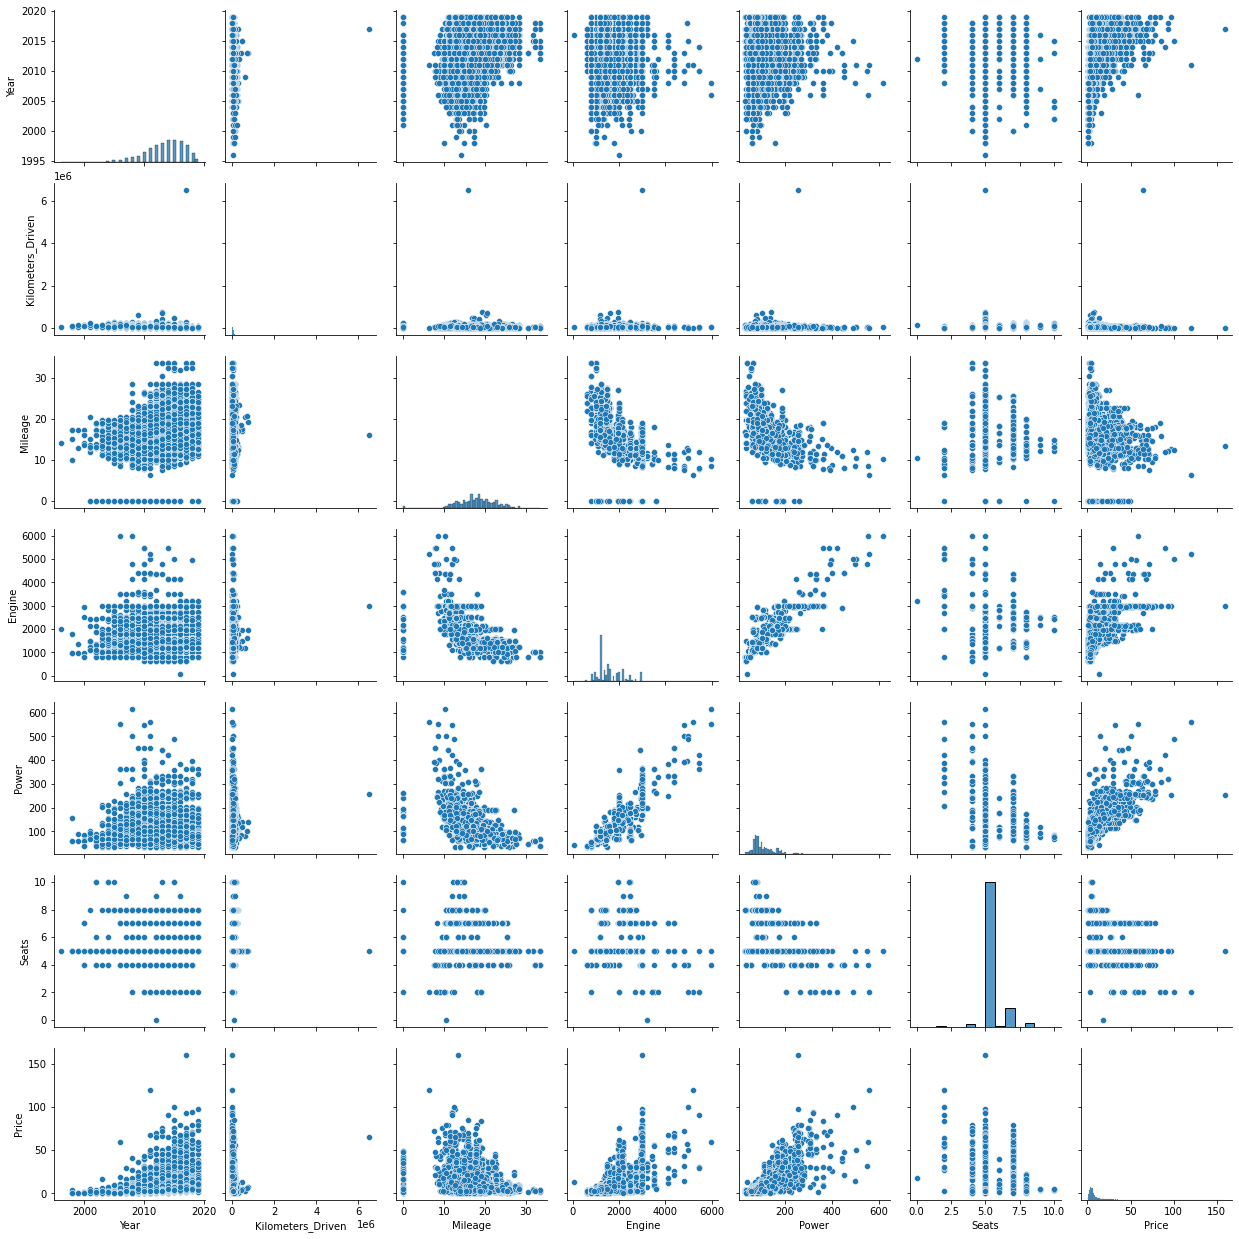

In [9]:
# start with pairplot
sns.pairplot(df)

<AxesSubplot:>

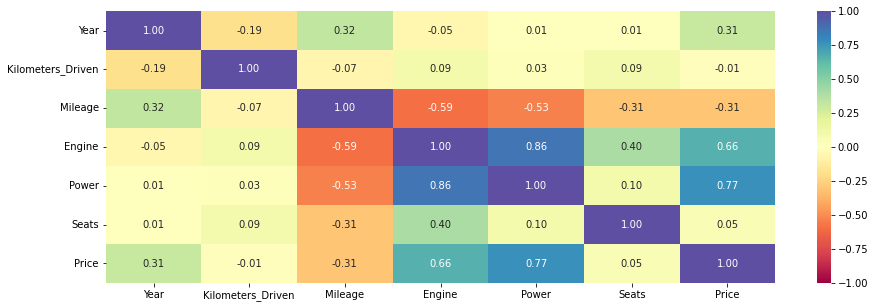

In [10]:
# and now heatmap
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", vmin = -1, vmax = 1, cmap = "Spectral")

# Notes  from pairplot and heatmap
- kilometers_driven is not easy to interpret
    - probably a case of skewness due to scale

- Engine and Power are highly correlated (0.86) (case of multilcolinearity)
- Engine and Mileage are also correlated (-0.59)


## 2.4  Further Tactics for preprocessing as learnt from pairplot and heatmap

We would apply the following tactics in further preprocessing as learnt from pairplot and correlation heatmap

- features Engine and Power are highly correlated (case of multilcolinearity)
    - only one feature should be retained for regression
        - let's keep Power since it has higher correlation with dependent variable, Price
        - drop the column Engine

- Also Year doesnt represent correctly the relation to Price, so let's change Year to Running Age, let's call Age_Of_Car
    - where Age_Of_Car = ( CurrentYear - ManufacturedYear + 1)
    - for e.g. if a car is manufactured in 2021, and current year is 2021, then the Age_Of_Car would be 2021 - 2021 + 1 = 1

## Now Let's plot the histogram to undestand the distribution of ['Kilometers_Driven', 'Price', 'Mileage']

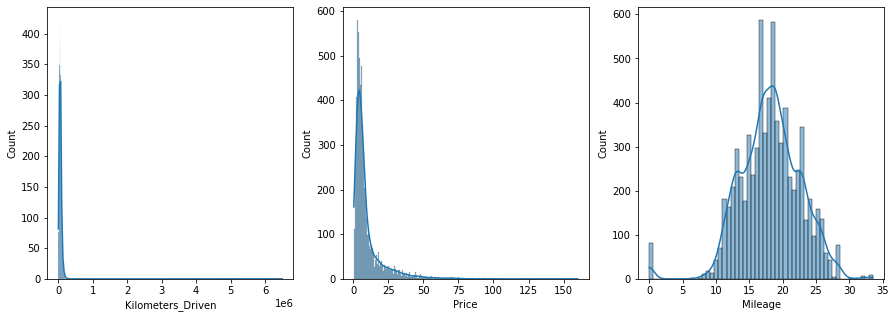

In [11]:
# setting figure size and axes
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (15,5))
cols = ['Kilometers_Driven', 'Price', 'Mileage']
for i, x in enumerate(cols):
    sns.histplot(x = x, data = df, kde = True, ax = ax[i])
    

### Apply log transformation to kilometers_driven

The skewness and scale of Kilometers_Driven could be improved by using log transformation
Log transformation to Kilometers_Driven could be applied since the min value is > 0 (171) as noted from descriptive statistics

<AxesSubplot:xlabel='Kilometers_Driven_log', ylabel='Count'>

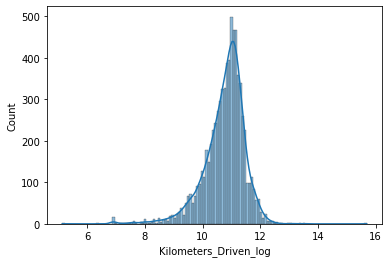

In [12]:
# trying the log trans
df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'])


# by default Kilometers_Driven_log column is added as the last column, we want Price (the dependent variable) to be the last column
position =6
column_to_reorder = df.pop('Kilometers_Driven_log')
df.insert(position, 'Kilometers_Driven_log', column_to_reorder)

# deleting 'Kilometers_Driven'
df.drop(['Kilometers_Driven'], axis = 1, inplace = True)

# plotting histplot 
sns.histplot(x ='Kilometers_Driven_log', data = df, kde = True)

## Drop the column Engine and create a new column Age_Of_Car

In [13]:
# drop Engine, New_Price
#df.drop(['Engine', 'New_Price'], axis = 1, inplace = True)
df.drop(['Engine'], axis = 1, inplace = True)

#change Year to car's age (where age of car = current year +1 - Manufactured year of car)
from datetime import date
curr_plus1 = date.today().year +1
df['Age_Of_Car'] = curr_plus1 - df['Year']

# by default Age_Of_car column is added as the last column, we want Price (the dependent variable) to be the last column
position =2
column_to_reorder = df.pop('Age_Of_Car')
df.insert(position, 'Age_Of_Car', column_to_reorder)

# drop df['Year']
df.drop(['Year'], axis = 1, inplace = True)



## Check pairplot and heatmap once more

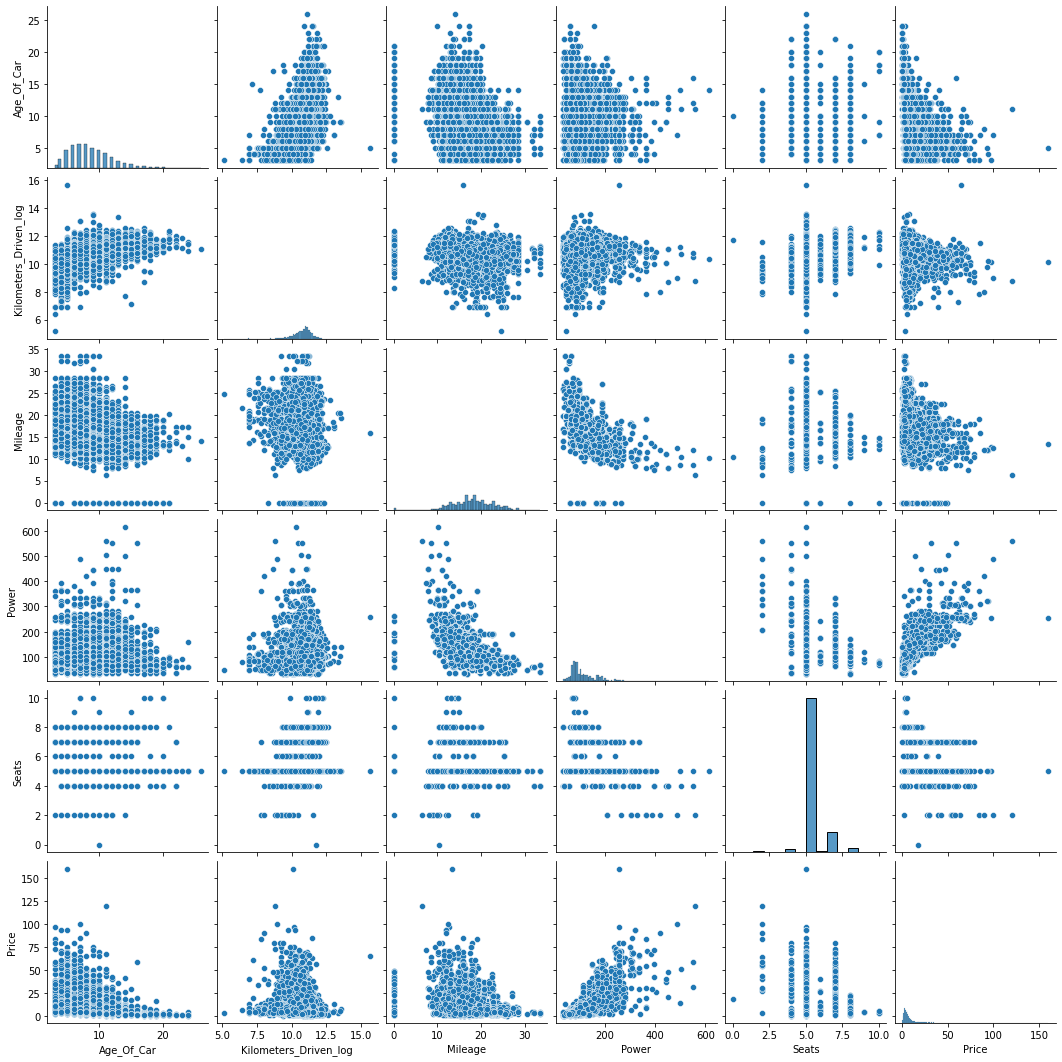

In [14]:
# plot pairplot 
sns.pairplot(df)

<AxesSubplot:>

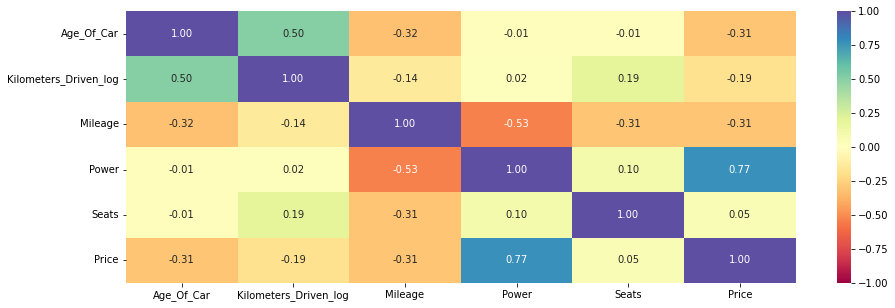

In [15]:
# plot heatmap
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", vmin = -1, vmax = 1, cmap = "Spectral")

# there is still some concern on multicolinearity,
- between mileage and power, a considerable correlation of -0.53
- between kilometers_driven_log and Age_Of_car (0.5)
- but let's leave those for this case

## 3 Preprocessing Strategy - Missing Values Treatment

First, Drop the rows where Dependent Variable 'Price' is null

In [16]:
# drop rows where the Dependent variable 'Price' is null
df = df.loc[df.Price.notnull(), :]

In [17]:
#Now check again what features have missing values (count and percentage)
mv = missing_values(df)
mv

,column_name,missing,percent_missing
0,Name,0,0.00
1,Location,0,0.00
2,Age_Of_Car,0,0.00
3,Fuel_Type,0,0.00
4,Transmission,0,0.00
5,Kilometers_Driven_log,0,0.00
6,Owner_Type,0,0.00
7,Mileage,2,0.03
8,Power,143,2.38
9,Seats,42,0.70


## 3.1 impute missing values of Seats, Power and Mileage with their respective median values

In [18]:
cols = ['Seats', 'Power', 'Mileage']
for cols in cols:
    df[cols].fillna(df[cols].median(), inplace=True)


In [19]:
#check and confirm again that there should be no missing values now for Seats, Power, Mileage
mv = missing_values(df)
display(mv)


,column_name,missing,percent_missing
0,Name,0,0.00
1,Location,0,0.00
2,Age_Of_Car,0,0.00
3,Fuel_Type,0,0.00
4,Transmission,0,0.00
5,Kilometers_Driven_log,0,0.00
6,Owner_Type,0,0.00
7,Mileage,0,0.00
8,Power,0,0.00
9,Seats,0,0.00


## 3.2 Run describe() on the numerical columns

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_Of_Car,6019.0,8.641801,3.269742,3.000000,6.000000,8.000000,11.000000,24.000000
Kilometers_Driven_log,6019.0,10.758780,0.715788,5.141664,10.434116,10.878047,11.198215,15.687313
Mileage,6019.0,18.134966,4.581528,0.000000,15.170000,18.150000,21.100000,33.540000
Power,6019.0,112.883539,53.283701,34.200000,78.000000,97.700000,138.030000,560.000000
Seats,6019.0,5.276790,0.806346,0.000000,5.000000,5.000000,5.000000,10.000000
Price,6019.0,9.479468,11.187917,0.440000,3.500000,5.640000,9.950000,160.000000


###  Note from the latest df.describe()
From the above we can see that the min values of Mileage and Seats are 0.0 (Zero), which doesnt make too much sense, 
since one can argue that it is impossible for any car to have Zero mileage or Zero Seat

Therefore, lets also impute Zero Mileage and Zero Seats with their median value

We can see that the max value of Seats is 10, which is plausible, but may be it is possible. Some cars may possibly be like Vans

In [21]:
# setting Seats and Mileage to their median value when the valus is Zero
df.loc[df.Seats ==0, 'Seats'] = df.Seats.median()
df.loc[df.Mileage ==0, 'Mileage'] = df.Mileage.median()

# 4 Feature Engineering

## 4.1 Strategy for treating missing values in New_Price Column

We already found out that many New_Price values are missing.
The following strategy I will be applying to treat this column:
1. Create a new colun called Brand by taking first two strings of Name column, for eg. the values of Brand will be
Audi A6, Audi A3, BMW 5, etc.
2. Groupby the Brand column and aggregate by the mean value of New_Price
3. Utilize that aggregated value of New_Price by Brand to impute missing value of New_Price in original dataframe
4. Finally check if New_Price < Price, then set New_Price to Price, coz New_Price < Price doesn't make too much sense


In [22]:
# create a funnction to break the Column Name into brand + Model , for eg Audi A6, BMW 5

def first_two_strings(xyz):
    if isinstance(xyz, str):
        return (xyz.split()[0] + ' ' +  xyz.split()[1] )
    else:
        return np.nan
    

In [23]:
# first change New_Price to numeric
df['New_Price'] = pd.to_numeric(df['New_Price'], errors = 'coerce')
df['Brand'] = df['Name'].apply(first_two_strings)
#df_gby = df.groupby('Brand').agg({'Price':'mean', 'New_Price': 'mean'}).reset_index()
df_gby = df.groupby('Brand').agg({'New_Price': 'mean'}).reset_index()


df_gby

,Brand,New_Price
0,Ambassador Classic,NaN
1,Audi A3,42.890000
2,Audi A4,52.510000
3,Audi A6,63.513333
4,Audi A7,NaN
...,...,...
211,Volvo S60,45.670000
212,Volvo S80,NaN
213,Volvo V40,37.900000
214,Volvo XC60,NaN


In [24]:
#map Mean_New_Price_Per_Brand to Brand
map_dict2 = dict(zip(df_gby.Brand, df_gby.New_Price))

df['Mean_New_Price_Per_Brand'] = df['Brand'].map(map_dict2)


In [25]:
## Let's also impute New_Price to Mean_New_Price_Per_Brand when New_Price is empty (NaN)

df['New_Price'] = np.where(df['New_Price'].isnull(),df['Mean_New_Price_Per_Brand'], df['New_Price'])

## Let's set New_Price to Price when (New_Price < Price or New_Price is Empty (NaN))
df['New_Price'] = np.where((df['New_Price'].isnull()) | (df['New_Price'] < df['Price']), df['Price'], df['New_Price'])




In [26]:
#check and confirm again that there is no missing values in New_Price now
mv = missing_values(df)
display(mv)
df.sample(6)


,column_name,missing,percent_missing
0,Name,0,0.00
1,Location,0,0.00
2,Age_Of_Car,0,0.00
3,Fuel_Type,0,0.00
4,Transmission,0,0.00
5,Kilometers_Driven_log,0,0.00
6,Owner_Type,0,0.00
7,Mileage,0,0.00
8,Power,0,0.00
9,Seats,0,0.00


,Name,Location,Age_Of_Car,Fuel_Type,Transmission,Kilometers_Driven_log,Owner_Type,Mileage,Power,Seats,New_Price,Price,Brand,Mean_New_Price_Per_Brand
2503,Maruti Ertiga VDI,Kolkata,8,Diesel,Manual,10.759009,First,20.77,88.76,7.0,11.526154,5.99,Maruti Ertiga,11.526154
328,Maruti Zen Estilo LXI Green (CNG),Pune,14,CNG,Manual,10.657165,First,26.30,67.10,5.0,1.400000,1.40,Maruti Zen,NaN
435,BMW 5 Series 2003-2012 GT 530d LE,Coimbatore,11,Diesel,Automatic,10.965298,First,16.20,258.00,5.0,68.545000,25.82,BMW 5,68.545000
4493,BMW 5 Series 530i Sedan,Kolkata,12,Petrol,Automatic,10.085809,First,10.60,258.00,5.0,68.545000,8.75,BMW 5,68.545000
5869,Maruti Wagon R VXI BS IV,Kolkata,11,Petrol,Manual,10.518673,Second,18.90,67.10,5.0,5.486571,2.10,Maruti Wagon,5.486571
2067,Maruti Swift Dzire VXi,Pune,14,Petrol,Manual,10.937206,Second,17.50,85.80,5.0,7.688462,2.40,Maruti Swift,7.688462


## 4.2 Strategy for dealing with Name Column
Since there are so many models of cars that one hot encoding wouldn't be practical, but we don't want to 
completely lose the information about model and their impact on car price

Therefore the following strategy will be utilized to deal with this case:

    1. Categorize the cars into categories like basic, mid, premium, luxury, ultra-luxury
    depending on the mean of New_Price column by brands that we completed imputing

In [27]:
# based on the New_Price which is now preprocessed completey let's now categorize car
df_gby = df.groupby('Brand').agg({'New_Price': 'mean'}).reset_index()

# the categorization will be done on brand 
# when mean of New_price (in lakhs):    basic: (0,10], mid: (10,20], premium: (20,40]
#                            luxury: (40, 60], ultra-luxury: 60

# apply binning technique via dataframe cut method
df_gby['Category'] = pd.cut(
     df_gby['New_Price'], [-np.inf, 10, 20, 40,60, np.inf], 
     labels = ['basic', 'mid', 'premium', 'luxury', 'ultra-luxury'])

display(df_gby)

##

map_dict1 = dict(zip(df_gby.Brand, df_gby.Category))

df['Car_Category'] = df['Brand'].map(map_dict1)

,Brand,New_Price,Category
0,Ambassador Classic,1.350000,basic
1,Audi A3,42.890000,luxury
2,Audi A4,52.510000,luxury
3,Audi A6,63.513333,ultra-luxury
4,Audi A7,27.230000,premium
...,...,...,...
211,Volvo S60,45.670000,luxury
212,Volvo S80,9.120000,basic
213,Volvo V40,37.900000,premium
214,Volvo XC60,18.480000,mid


In [28]:
# take a latest peek at the data
df.sample(4)

,Name,Location,Age_Of_Car,Fuel_Type,Transmission,Kilometers_Driven_log,Owner_Type,Mileage,Power,Seats,New_Price,Price,Brand,Mean_New_Price_Per_Brand,Car_Category
2907,Jaguar XJ 3.0L Portfolio,Hyderabad,7,Diesel,Automatic,10.165852,First,14.47,301.73,5.0,75.000,75.00,Jaguar XJ,NaN,ultra-luxury
2199,Toyota Camry Hybrid,Delhi,7,Petrol,Automatic,10.126631,First,19.16,158.20,5.0,40.620,25.00,Toyota Camry,40.620,luxury
1727,Chevrolet Aveo U-VA 1.2 LS,Pune,15,Petrol,Manual,10.985293,Third,15.26,74.90,5.0,0.990,0.99,Chevrolet Aveo,NaN,basic
5946,BMW 5 Series 2013-2017 530d M Sport,Bangalore,6,Diesel,Automatic,9.680344,First,14.69,258.00,5.0,68.545,48.00,BMW 5,68.545,ultra-luxury


## 4.3 Strategy for treating Location Column

Assuming Location may have some impact on demand, it would be still too much taxing for the model to take all cities to the model. So using the business domain and native knowledge about India in this case, we can tier cities into Tier1 and Other_Tier

In [29]:
# Place ['Mumbai', 'Delhi', 'Chennai', 'Kolkata', 'Bangalore', 'Hyderabad'] in Tier1
# Place ['Pune', 'Coimbatore', 'Ahmedabad','Jaipur','Kochi' ] in Other_Tier

Tier1 = ['Mumbai', 'Delhi', 'Chennai', 'Kolkata', 'Bangalore', 'Hyderabad']
Other_Tier = ['Pune', 'Coimbatore', 'Ahmedabad','Jaipur','Kochi' ]

# create a empty dictionary
# we will append the dictionary with cities from the above lists
d = {}
for v in Tier1:
    d.update({v:'Tier1'})

for v in Other_Tier:
    d.update({v:'Other_Tier'})

# create a new column Location_Category using series map method and the dictinory of Cities and Tiers
df['Location_Category'] = df['Location'].map(d)



## 4.4 Strategy for treating Owner_Type Column

Assuming the ordinal hierarchy in ownership: 'Fourth & Above' < 'Third' < 'Second' < 'First'; let's label encode
'First' = 4, 'Second' = 3, 'Third' = 2, 'Fourth & Above' = 1

In [30]:
# get all unique values of Owner_Type
df.Owner_Type.unique()

# Assuming the ordinal hierarchy: 'Fourth & Above' < 'Third' < 'Second' < 'First'
# Labeling'First' = 4, 'Second' = 3, 'Third' = 2, 'Fourth & Above' = 1
# create a dictionary with the logic above
d = {'First' : 4, 'Second' : 3, 'Third' : 2, 'Fourth & Above' : 1}

# refresh df['Owner_Type'] by mapping values with the above dictionary
df['Owner_Type'] = df['Owner_Type'].map(d)

print(df.dtypes)   # ensure the label encoding also changed the dtype for Owner_Type to numeric from Object

Name                         object
Location                     object
Age_Of_Car                    int64
Fuel_Type                    object
Transmission                 object
Kilometers_Driven_log       float64
Owner_Type                    int64
Mileage                     float64
Power                       float64
Seats                       float64
New_Price                   float64
Price                       float64
Brand                        object
Mean_New_Price_Per_Brand    float64
Car_Category                 object
Location_Category            object
dtype: object


In [31]:
# drop columns Name,  Location, Mean_New_Price_Per_Brand, Brand
df.drop(['Name', 'Location', 'Mean_New_Price_Per_Brand','Brand'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age_Of_Car             6019 non-null   int64  
 1   Fuel_Type              6019 non-null   object 
 2   Transmission           6019 non-null   object 
 3   Kilometers_Driven_log  6019 non-null   float64
 4   Owner_Type             6019 non-null   int64  
 5   Mileage                6019 non-null   float64
 6   Power                  6019 non-null   float64
 7   Seats                  6019 non-null   float64
 8   New_Price              6019 non-null   float64
 9   Price                  6019 non-null   float64
 10  Car_Category           6019 non-null   object 
 11  Location_Category      6019 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 611.3+ KB


In [32]:
# ensure no missing values anymore now
mv = missing_values(df)
mv

,column_name,missing,percent_missing
0,Age_Of_Car,0,0.0
1,Fuel_Type,0,0.0
2,Transmission,0,0.0
3,Kilometers_Driven_log,0,0.0
4,Owner_Type,0,0.0
5,Mileage,0,0.0
6,Power,0,0.0
7,Seats,0,0.0
8,New_Price,0,0.0
9,Price,0,0.0


In [33]:
df.sample(6)

,Age_Of_Car,Fuel_Type,Transmission,Kilometers_Driven_log,Owner_Type,Mileage,Power,Seats,New_Price,Price,Car_Category,Location_Category
436,6,Petrol,Manual,10.441938,4,22.74,47.30,5.0,4.403333,3.74,basic,Other_Tier
450,5,Petrol,Manual,10.172942,4,18.60,81.83,5.0,9.995000,7.98,basic,Other_Tier
1841,6,Petrol,Automatic,9.740969,4,15.50,122.00,5.0,34.630000,17.25,premium,Tier1
5859,6,Diesel,Manual,11.198940,4,13.00,168.50,7.0,36.497143,20.00,premium,Other_Tier
3905,8,Petrol,Automatic,11.112448,4,19.16,158.20,5.0,40.620000,18.75,luxury,Tier1
2596,11,Petrol,Manual,11.002100,4,20.36,78.90,5.0,3.200000,3.20,basic,Tier1


# 5 Prepare data for running Multiple Regression

## 5.1 Run One hot encoding

 - Run one hot encoding, by removing the first columns, for categorial variables
     - Fuel_Type, Transmission, Car_Category, Location_Category
     - Use Pandas get_dummies method, 
     - check df.info() once more to ensure all columns are numerical now, also as a result of one hot encoding
   
 

In [34]:
# run one hot encoder using dataframe get_dummies method
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Car_Category', 'Location_Category'])

In [35]:
# ensure all dtypes are numeric for the purpose of regression
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_Of_Car                    6019 non-null   int64  
 1   Kilometers_Driven_log         6019 non-null   float64
 2   Owner_Type                    6019 non-null   int64  
 3   Mileage                       6019 non-null   float64
 4   Power                         6019 non-null   float64
 5   Seats                         6019 non-null   float64
 6   New_Price                     6019 non-null   float64
 7   Price                         6019 non-null   float64
 8   Fuel_Type_CNG                 6019 non-null   uint8  
 9   Fuel_Type_Diesel              6019 non-null   uint8  
 10  Fuel_Type_Electric            6019 non-null   uint8  
 11  Fuel_Type_LPG                 6019 non-null   uint8  
 12  Fuel_Type_Petrol              6019 non-null   uint8  
 13  Tra

# 6 Generate the Model for Multiple Regression

In [36]:
# prepare X and y
X = df.drop(['Price', 'Fuel_Type_CNG','Transmission_Manual',
             'Car_Category_ultra-luxury','Location_Category_Other_Tier'], axis = 1)
# dropping the first columns from each set of one hot encoder columns 

y = df[['Price']]

In [37]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [38]:
# coefficients
for idx, col_name in enumerate(X_train.columns):
    print(f'The coefficient for {col_name} is {regression_model.coef_[0][idx]}')

The coefficient for Age_Of_Car is -0.7937327994430882
The coefficient for Kilometers_Driven_log is -1.625963225549064
The coefficient for Owner_Type is -0.11500077745236127
The coefficient for Mileage is -0.12574901953550582
The coefficient for Power is 0.08596717171425367
The coefficient for Seats is -0.4411486912774278
The coefficient for New_Price is 0.1825392573067199
The coefficient for Fuel_Type_Diesel is 0.3374806715515268
The coefficient for Fuel_Type_Electric is 10.47310465948403
The coefficient for Fuel_Type_LPG is 1.4919852819202568
The coefficient for Fuel_Type_Petrol is -1.8226306835166501
The coefficient for Transmission_Automatic is 0.05411288501197017
The coefficient for Car_Category_basic is 0.35192870960045003
The coefficient for Car_Category_luxury is 0.3092895321633667
The coefficient for Car_Category_mid is -1.4805407145357332
The coefficient for Car_Category_premium is 0.5612245588984737
The coefficient for Location_Category_Tier1 is -0.43093124485817846


In [39]:
# intercept
print(f'The intercept for our model is {regression_model.intercept_[0]}')

The intercept for our model is 26.59513665170916


In [40]:
# write functions to calculate R-Square, Adjusted R-Square, SSE, SST
def r_square(model,X,y):
    return model.score(X, y)

def adj_r_square(model,X,y):
    return 1 - (1 -model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

def sse_sst(model, X, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(X)) ** 2).sum()
    return SSE, SST



## 6.1 Print the scores

In [41]:
print('***The Scores***')
print('==========================================================')
print(f'The R-Square for train is: {r_square(regression_model, X_train, y_train)}')
print(f'The Adjusted R-Square for train is: {adj_r_square(regression_model, X_train, y_train)}')
print(f'The R-Square for test is: {r_square(regression_model, X_test, y_test)}')
print(f'The Adjusted R-Square for test is: {adj_r_square(regression_model, X_test, y_test)}')
print('==========================================================')

SSE_train, SST_train = sse_sst(regression_model, X_train, y_train)
print(f'Train SSE: {SSE_train}')
print(f'Train SST: {SST_train}')

print('===========================================================')
SSE_test, SST_test = sse_sst(regression_model, X_test, y_test)
print(f'Test SSE: {SSE_test}')
print(f'Test SST: {SST_test}')


***The Scores***
The R-Square for train is: 0.7497520205160928
The Adjusted R-Square for train is: 0.7487379047470281
The R-Square for test is: 0.7793777958725232
The Adjusted R-Square for test is: 0.7772801574663895
Train SSE: Price    134809.708968
dtype: float64
Train SST: Price    538704.485229
dtype: float64
Test SSE: Price    47316.90035
dtype: float64
Test SST: Price    214470.254875
dtype: float64


In [42]:
#RMSE for test
print(np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))))

# MAE for test
print(mean_absolute_error(y_test, regression_model.predict(X_test)))

5.1185773493280395
3.0168294550471058


## 6.2 Check with interaction terms


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.910626205353959


### As expected in-sample Rsquare did improve, however the real check would be on test dataset

In [44]:
#Out off sample (testing) R^2 is our measure of sucess 
print(poly_clf.score(X_test2, y_test))

0.61388014485773


### Adding interaction terms degarded Rsquare massively for off-sample (test set)

In [45]:
print(X_train.shape)
print(X_train2.shape)

(4213, 17)
(4213, 154)


### it also added 137 additional columns, so we'll ignore adding interaction terms

 - Accepting the original linear model that we created with 0.75 R-square for Train and 0.78 R-square for Test

# Insights and business recommendations to Cars4U
1. Based on the used_car_sales colected data and format, our model can ccurately predict up to 0.75 R-squared accuracy
2. However, Cars4U should still collect some more fields to improve the accuracy of prediction
3. Fuel Type, especially Electric, seems to have significant influence on selling Price, so Cars4U should consider incorporating & focusing on those
4. Kilometers driven is another important feature for Cars4U business
5. Car Model or brand of cars is also another important feature for Cars4U to ensure while building Sales prediction model
6. In many cases New_Price is not known or missing, it may be worth for Cars4U to create a model to predict the New_Price that should then be plugged in predicting Price
